Epoch 1/1000
22/22 [==============================] - 0s 2ms/step - loss: 1.8719 - mean_absolute_error: 1.0431
Epoch 2/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.5033 - mean_absolute_error: 0.6169
Epoch 3/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4636 - mean_absolute_error: 0.6019
Epoch 4/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4450 - mean_absolute_error: 0.5865
Epoch 5/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4445 - mean_absolute_error: 0.5811
Epoch 6/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4438 - mean_absolute_error: 0.5792
Epoch 7/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4358 - mean_absolute_error: 0.5744
Epoch 8/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4341 - mean_absolute_error: 0.5744
Epoch 9/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.4303 - mean_absolute_error: 0.5692
E

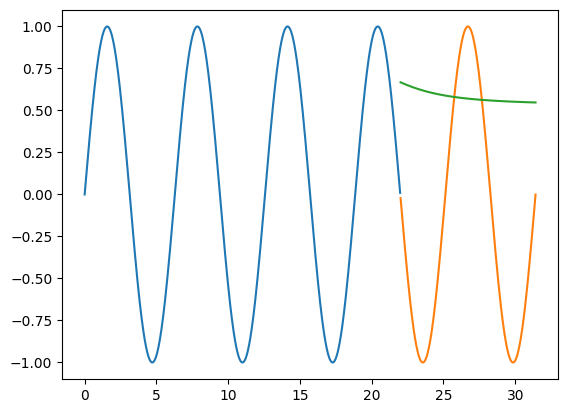

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(units=512,activation='tanh',input_shape=(1,)),
    keras.layers.Dense(units=256,activation='tanh'),
    keras.layers.Dense(units=128,activation='tanh'),
    keras.layers.Dense(units=1,activation='linear')
])

X = np.linspace(0,10*np.pi,1000)
Y = np.sin(X)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.3,shuffle=False)
plt.plot(X_train,y_train)
plt.plot(X_test,y_test)
MAX_EPOCHS = 1000

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='mean_absolute_error',
                                                patience=10,
                                                mode='min')
model.compile(loss=tf.losses.MeanSquaredError(),
            optimizer=tf.optimizers.Adam(),
            metrics=[tf.metrics.MeanAbsoluteError()])
history = model.fit(X_train,y_train, batch_size=32,epochs=MAX_EPOCHS,
                    callbacks=[early_stopping])
y_pred = model.predict(X_test)
plt.plot(X_test,y_pred)
